## A bit of Theory

In [1]:
import numpy as np
import pandas as pd
import matplotlib

In [2]:
a_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Finland'],
    'Population (M)': [82.8, 67.2, 11.4, 5.5],
    'Capital': ['Berlin', 'Paris', 'Brussels', 'Helsinki']
})
a_df

,Country,Population (M),Capital
0,Germany,82.8,Berlin
1,France,67.2,Paris
2,Belgium,11.4,Brussels
3,Finland,5.5,Helsinki


In [3]:
b_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Canada'],
    'HDI': [0.936, 0.901, 0.916, 0.926]
})
b_df

,Country,HDI
0,Germany,0.936
1,France,0.901
2,Belgium,0.916
3,Canada,0.926


In [4]:
type(a_df)

pandas.core.frame.DataFrame

## examples

In [5]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],'value': [5, 6, 7, 8]})

In [6]:
df1 

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5


In [7]:
df2

,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [8]:
df1.merge(df2, left_on='lkey', right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


## Back to exercise

In [9]:
a_df.merge(b_df, left_on='Country', right_on='Country')

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916


## Inner Merge

In [10]:
inner_merged_df = a_df.merge(b_df, on='Country')
inner_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916


In [11]:
a_df.merge(b_df, on='Country', how='inner')

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916


## Left Merge

In [12]:
left_merged_df = a_df.merge(b_df, on='Country', how='left')
left_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Finland,5.5,Helsinki,NaN


## Right Merge

In [13]:
right_merged_df = a_df.merge(b_df, on='Country', how='right')
right_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Canada,NaN,NaN,0.926


## Outer Merge

In [14]:
outer_merged_df = a_df.merge(b_df, on='Country', how='outer')
outer_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Finland,5.5,Helsinki,NaN
4,Canada,NaN,NaN,0.926


In [15]:
outer_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 4 columns):
Country           5 non-null object
Population (M)    4 non-null float64
Capital           4 non-null object
HDI               4 non-null float64
dtypes: float64(2), object(2)
memory usage: 200.0+ bytes


## JOIN

In [16]:
aa_df = a_df.set_index("Country")
aa_df

,Population (M),Capital
Country,,
Germany,82.8,Berlin
France,67.2,Paris
Belgium,11.4,Brussels
Finland,5.5,Helsinki


In [17]:
bb_df = b_df.set_index("Country")
bb_df

,HDI
Country,
Germany,0.936
France,0.901
Belgium,0.916
Canada,0.926


In [18]:
aa_df.join(bb_df)

,Population (M),Capital,HDI
Country,,,
Germany,82.8,Berlin,0.936
France,67.2,Paris,0.901
Belgium,11.4,Brussels,0.916
Finland,5.5,Helsinki,NaN


In [19]:
aa_df.join(bb_df, how='inner')


,Population (M),Capital,HDI
Country,,,
Germany,82.8,Berlin,0.936
France,67.2,Paris,0.901
Belgium,11.4,Brussels,0.916


In [20]:
aa_df.join(bb_df, how='right')


,Population (M),Capital,HDI
Country,,,
Germany,82.8,Berlin,0.936
France,67.2,Paris,0.901
Belgium,11.4,Brussels,0.916
Canada,NaN,NaN,0.926


In [21]:
aa_df.join(bb_df, how='outer')

,Population (M),Capital,HDI
Country,,,
Belgium,11.4,Brussels,0.916
Canada,NaN,NaN,0.926
Finland,5.5,Helsinki,NaN
France,67.2,Paris,0.901
Germany,82.8,Berlin,0.936


In [22]:
aa_df.join(bb_df, how='left')

,Population (M),Capital,HDI
Country,,,
Germany,82.8,Berlin,0.936
France,67.2,Paris,0.901
Belgium,11.4,Brussels,0.916
Finland,5.5,Helsinki,NaN


In [23]:
#❓ You see that .merge() and .join() give the same outcome in the end. So when should you one or the other?

#View solution
#You can use .merge() when you want to merge based on a given column and .join() when you want to join on the index.

## Concat

In [24]:
concat_df = pd.concat([a_df, b_df], axis="index", sort=False)
concat_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,NaN
1,France,67.2,Paris,NaN
2,Belgium,11.4,Brussels,NaN
3,Finland,5.5,Helsinki,NaN
0,Germany,NaN,NaN,0.936
1,France,NaN,NaN,0.901
2,Belgium,NaN,NaN,0.916
3,Canada,NaN,NaN,0.926


## Loading data from multiple CSVs

In [25]:
import numpy as np
import pandas as pd

In [26]:
countries_df = pd.read_csv("./Olympic Games/dictionary.csv")

In [27]:
countries_df

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
5,Angola,ANG,25021974.0,4101.472152
6,Antigua and Barbuda,ANT,91818.0,13714.731962
7,Argentina,ARG,43416755.0,13431.878340
8,Armenia,ARM,3017712.0,3489.127690
9,Aruba*,ARU,103889.0,NaN


In [28]:
summer_df=pd.read_csv("./Olympic Games/summer.csv")

In [29]:
summer_df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold


In [30]:
summer_df.rename(columns={"Country": "Code"}, inplace=True)
summer_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [31]:
winter_df=pd.read_csv("./Olympic Games/winter.csv")
winter_df.rename(columns={"Country":"Code"},inplace=True)
winter_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [32]:
#OLMADI if winter_df.columns==summer_df.columns:
 #   return True
#else:
 #   return False

In [33]:
winter_df.columns==summer_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [34]:
summer_countries_df = summer_df.merge(countries_df, on="Code")

## add a column

In [35]:
summer_countries_df["Season"] = "Summer"

In [36]:
summer_countries_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.54346,Summer
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,9844686.0,12363.54346,Summer
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary,9844686.0,12363.54346,Summer
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,Hungary,9844686.0,12363.54346,Summer
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,Hungary,9844686.0,12363.54346,Summer


In [37]:
winter_countries_df=winter_df.merge(countries_df,on="Code")
winter_countries_df["Season"]= "Winter"
winter_countries_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
4,1924,Chamonix,Curling,Curling,"ALDEERT, H.",FRA,Men,Curling,Bronze,France,66808385.0,36205.568102,Winter


In [38]:
winter_countries_df.shape

(4826, 13)

In [39]:
summer_countries_df.shape

(25742, 13)

In [40]:
all_df=pd.concat([winter_countries_df, summer_countries_df], axis="index", sort=False)

In [41]:
#Dogrusu ya da aynisi...
#all_df = pd.concat([summer_countries_df, winter_countries_df], sort=False)
#all_df.head()

In [42]:
all_df

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
4,1924,Chamonix,Curling,Curling,"ALDEERT, H.",FRA,Men,Curling,Bronze,France,66808385.0,36205.568102,Winter
5,1924,Chamonix,Curling,Curling,"ANDRE, Georges",FRA,Men,Curling,Bronze,France,66808385.0,36205.568102,Winter
6,1924,Chamonix,Curling,Curling,BENEDIC,FRA,Men,Curling,Bronze,France,66808385.0,36205.568102,Winter
7,1924,Chamonix,Curling,Curling,"CANIVET, P.",FRA,Men,Curling,Bronze,France,66808385.0,36205.568102,Winter
8,1924,Chamonix,Curling,Curling,"COURNOLLET, F.",FRA,Men,Curling,Bronze,France,66808385.0,36205.568102,Winter
9,1924,Chamonix,Curling,Curling,"PLANQUE, R.",FRA,Men,Curling,Bronze,France,66808385.0,36205.568102,Winter


In [43]:
all_df["Country"]

0                      France
1                      France
2                      France
3                      France
4                      France
5                      France
6                      France
7                      France
8                      France
9                      France
10                     France
11                     France
12                     France
13                     France
14                     France
15                     France
16                     France
17                     France
18                     France
19                     France
20                     France
21                     France
22                     France
23                     France
24                     France
25                     France
26                     France
27                     France
28                     France
29                     France
                 ...         
25712                Paraguay
25713                Paraguay
25714     

In [44]:
#def top_10_countries(country):
 #   n=0
  #  for country in all_df["Country"]:
   #     while all_df["Year"]>=1984:
    #        if country =="Country":
     #           n+=1
    #return n

In [45]:
#top_10_countries("China")

In [46]:
all_count_df = all_df[all_df["Year"] >= 1984].groupby(["Country"]).count()
all_count_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Population,GDP per Capita,Season
Country,,,,,,,,,,,,
Afghanistan,2,2,2,2,2,2,2,2,2,2,2,2
Algeria,15,15,15,15,15,15,15,15,15,15,15,15
Argentina,173,173,173,173,173,173,173,173,173,173,173,173
Armenia,11,11,11,11,11,11,11,11,11,11,11,11
Australia,891,891,891,891,891,891,891,891,891,891,891,891


In [47]:
all_count_df = all_df[all_df["Year"] >= 1984].groupby(["Country"]).count()[["Medal"]]
all_count_df.tail(10)

,Medal
Country,
United Arab Emirates,1
United Kingdom,545
United States,2472
Uruguay,1
Uzbekistan,21
Venezuela,7
Vietnam,2
Virgin Islands*,1
Zambia,2


In [48]:
all_count_df = all_df[all_df["Year"] >= 1984].groupby(["Country"]).count()[["Medal"]].sort_values(by="Medal", ascending=False)
all_count_df

,Medal
Country,
United States,2472
Germany,1112
Russia,1031
Australia,891
China,889
Canada,801
Italy,632
"Korea, South",587
France,587


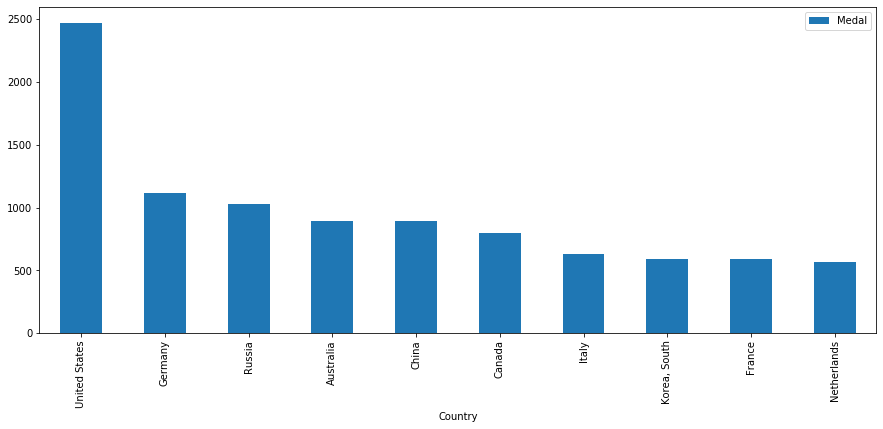

In [53]:
all_count_df.head(10).plot(kind="bar",figsize=(15,6))

In [60]:
#find it !                                                             all_count_df.loc[all_count_df['Country'].isin("Turkey")]

## Optional VERY IMPORTANT THAT YOU WORK ON IT AGAIN!!

In [61]:
season_count_df = all_df.groupby(["Country", "Season"])["Medal"].count().unstack()
season_count_df.fillna(0, inplace=True)
season_count_df["Summer"] = season_count_df["Summer"].astype(int)
season_count_df["Winter"] = season_count_df["Winter"].astype(int)
season_count_df.head(10)

Season,Summer,Winter
Country,,
Afghanistan,2,0
Algeria,15,0
Argentina,259,0
Armenia,11,0
Australia,1189,15
Austria,146,280
Azerbaijan,26,0
Bahamas,27,0
Bahrain,1,0


In [62]:
season_count_df["Total"] = all_count_df
season_count_df.head(10)

Season,Summer,Winter,Total
Country,,,
Afghanistan,2,0,2.0
Algeria,15,0,15.0
Argentina,259,0,173.0
Armenia,11,0,11.0
Australia,1189,15,891.0
Austria,146,280,205.0
Azerbaijan,26,0,26.0
Bahamas,27,0,23.0
Bahrain,1,0,1.0


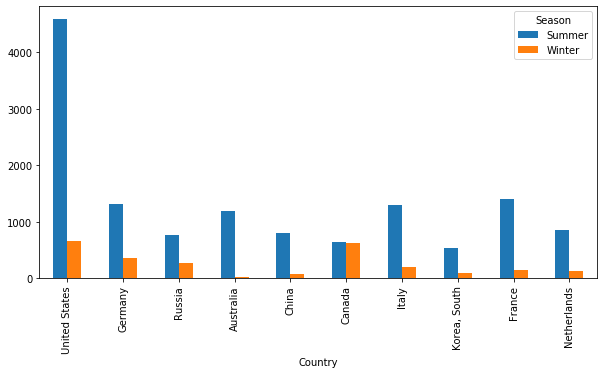

In [65]:
season_count_df.sort_values(by="Total", ascending=False)[["Summer", "Winter"]].head(10).plot(kind="bar",figsize=(10,5))